# CNN (CONVOLUTIONAL NEURAL NETWORK) ON CIFAR 10 DATASET

# IMPORTING THE DEPENDENCIES

In [2]:
import tensorflow as tf

# IMPORTING THE CIFAR 10 DATASET

In [3]:
from tensorflow.keras.datasets import cifar10

# MENTION THE CLASS NAMES MANUALLY

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# LOADING THE CIFAR DATA AND THEN SPLITTING THE LOADED DATA INTO TRAIN AND TEST

In [7]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# IMAGE NORMALIZATION

In [8]:
x_train=x_train/255.0

In [9]:
x_train.shape                     # 50000 IS THE NO OF IMAGES, 32, 32 IS THE SIZE OF THE MAGE AND 3 DENOTES (R, G, B)

(50000, 32, 32, 3)

In [10]:
x_test=x_test/255.0

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

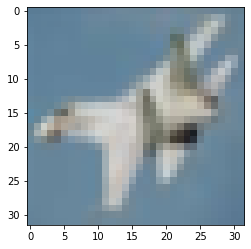

In [32]:
plt.imshow(x_test[10])                     # CODE TO DISPLAY THE IMAGE

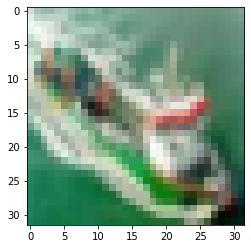

In [17]:
plt.imshow(x_test[15])

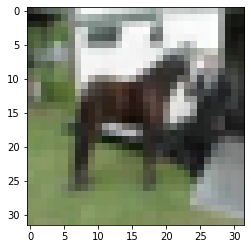

In [19]:
plt.imshow(x_test[20])

# DEFINING THE MODEL

In [20]:
model=tf.keras.models.Sequential()

# ADDING THE FIRST CNN LAYER

In [21]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[32,32,3]))

# ADDING THE SECOND CNN LAYERS AND MAX POOLING LAYER

In [23]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='valid'))

# ADDING THE THIRD CNN LAYER

In [24]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

# ADDING THE FOURTH CNN LAYER AND MAX POOLING LAYER

In [25]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='valid'))

# ADDING THE FLATTENING LAYER

In [26]:
model.add(tf.keras.layers.Flatten())

# ADDING THE FIRST DENSE LAYER, THEN HIDDEN LAYER AND THEN OUTPUT LAYER

In [27]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [28]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adagrad',metrics=['sparse_categorical_accuracy'])

# TRAINING THE MODEL

In [31]:
model.fit(x_train,y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 236s 150ms/step - loss: 2.1795 - sparse_categorical_accuracy: 0.2094
Epoch 2/6
1563/1563 [==============================] - 238s 152ms/step - loss: 1.8954 - sparse_categorical_accuracy: 0.3291
Epoch 3/6
1563/1563 [==============================] - 238s 152ms/step - loss: 1.7725 - sparse_categorical_accuracy: 0.3744
Epoch 4/6
1563/1563 [==============================] - 237s 152ms/step - loss: 1.6630 - sparse_categorical_accuracy: 0.4155
Epoch 5/6
1563/1563 [==============================] - 237s 152ms/step - loss: 1.5832 - sparse_categorical_accuracy: 0.4432
Epoch 6/6
1563/1563 [==============================] - 237s 152ms/step - loss: 1.5272 - sparse_categorical_accuracy: 0.4618


# TESTING THE MODEL

In [33]:
test_loss, test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 11s 36ms/step - loss: 1.5020 - sparse_categorical_accuracy: 0.4673


In [34]:
print(test_accuracy)

0.4672999978065491


# ACCURACY OF THE MODEL IS 46.72%